<a href="https://colab.research.google.com/github/Aishwarya-RaviK/Loan_Prediction-Classification/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict Loan Eligibility for Dream Housing Finance company**

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.


Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

# **Importing Libraries**

In [547]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

# **Loading data**

In [548]:
train=pd.read_csv("/content/train_ctrUa4K.csv")
test=pd.read_csv("/content/test_lAUu6dG.csv")

In [549]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [550]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [551]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [552]:
data=pd.concat([train,test])

In [553]:
data.drop(columns='Loan_ID',axis=1,inplace=True)

# **Cleaning data**

In [554]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [555]:
data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [556]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

*1.Gender*

In [557]:
data['Gender'].unique() 
data['Gender'].mode()  # Male
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [558]:
data.isnull().sum()

Gender                 0
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

*2. Married*

In [559]:
data['Married'].unique()  
data['Married'].fillna(data['Married'].mode()[0],inplace=True) 
data.isnull().sum()

Gender                 0
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

*3.Dependents*

In [560]:
data['Dependents'].unique()
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

*4. Education, Applicant's Income, Co-applicant's Income, Property area*

In [561]:
data['Education'].unique()
data['Property_Area'].unique()
print(data['ApplicantIncome'].dtype)
print(data['CoapplicantIncome'].dtype)

int64
float64


*5. Self_Employed*

In [562]:
print(data['Self_Employed'].unique())
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

['No' 'Yes' nan]


*6. Loan Amount*

In [563]:
data['LoanAmount'].dtype
data['LoanAmount'].describe()
q1=data['LoanAmount'].quantile(0.25)
q3=data['LoanAmount'].quantile(0.75)
iqr=q3-q1 
minimum=q1-1.5*(iqr)
maximum=q3+1.5*(iqr)
print(minimum,maximum)

7.0 255.0


In [564]:
data['LoanAmount'].describe()

count    954.000000
mean     142.511530
std       77.421743
min        9.000000
25%      100.000000
50%      126.000000
75%      162.000000
max      700.000000
Name: LoanAmount, dtype: float64

We can't fix the outliers as the loan amount could be huge depending on the salary.

In [565]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

*7. Credit History*

In [566]:
data['Credit_History'].dtype 
data['Credit_History'].unique()
data['Credit_History'].fillna(data['Credit_History'].median(),inplace=True)

*8.Loan Status*

In [567]:
data['Loan_Status'].unique() 

array(['Y', 'N', nan], dtype=object)

In [568]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


*9.Loan amount term*

In [569]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

# **Encoding data**

In [570]:
# Feature to encode 1. Gender, 2.Married, 3.Education, 4.Self_Employed, 5. Credit History, 6.Property Area, 7.Loan_status 
label=LabelEncoder() 
data['Gender']= data['Gender'].map({'Male':0,'Female':1}).astype(int)
data['Married']= data['Married'].map({'No':0,'Yes':1}).astype(int)
data['Education']= data['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
data['Self_Employed']= data['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
data['Credit_History']= data['Credit_History'].astype(int)

In [571]:
data['Property_Area']=data['Property_Area'].map({"Urban":0,"Rural":1,"Semiurban":2}).astype(int)
data['Dependents']=data['Dependents'].map({"0":0,"1":1,"2":2,"3+":3})

In [572]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,126.0,360.0,1,0,Y
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1,1,N
2,0,1,0,1,1,3000,0.0,66.0,360.0,1,0,Y
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1,0,Y
4,0,0,0,1,0,6000,0.0,141.0,360.0,1,0,Y


# **Splitting the data**

In [573]:
train=data.iloc[:614]
test=data.iloc[614:]

In [574]:
train['Loan_Status']=train['Loan_Status'].map({'Y':1,'N':0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# **Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

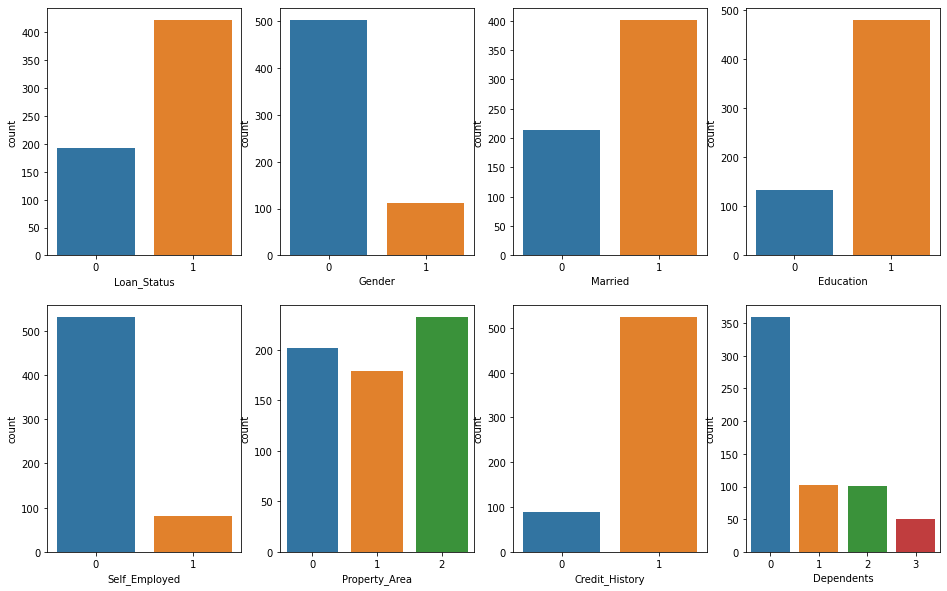

In [575]:
fig,ax=plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status',data=train,ax=ax[0][0])
sns.countplot('Gender',data=train,ax=ax[0][1])
sns.countplot('Married',data=train,ax=ax[0][2])
sns.countplot('Education',data=train,ax=ax[0][3])
sns.countplot('Self_Employed',data=train,ax=ax[1][0])
sns.countplot('Property_Area',data=train,ax=ax[1][1])
sns.countplot('Credit_History',data=train,ax=ax[1][2])
sns.countplot('Dependents',data=train,ax=ax[1][3])


# **Observations**:

More number of loans are approved than rejected.

Number of male applicants is more than Female.

Number of married applicants are more than number of unmarried applicants.

Number of self-employed customers who have applied for loan are less.

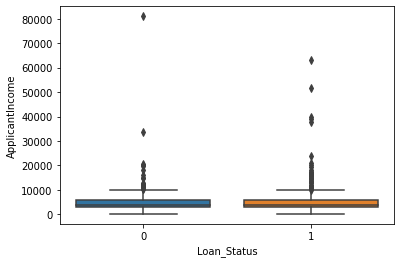

In [576]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=train)

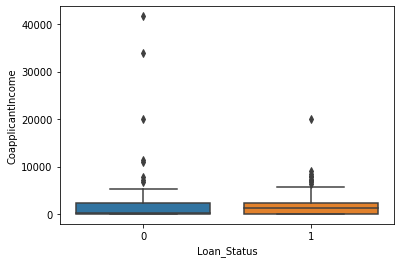

In [577]:
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=train)

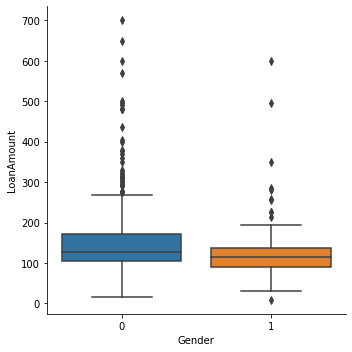

In [578]:
sns.catplot(x='Gender',y='LoanAmount',data=train,kind='box')

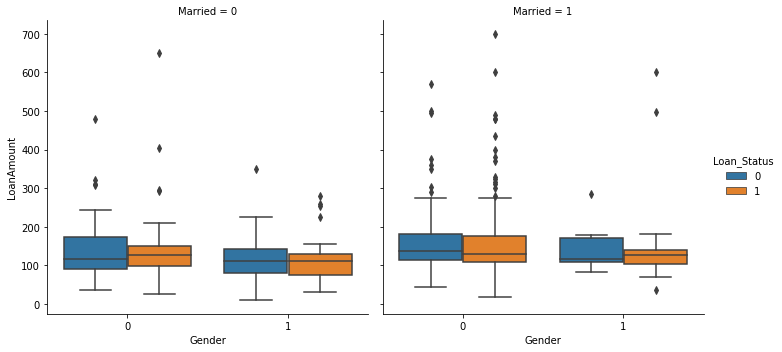

In [579]:
sns.catplot(x='Gender',y='LoanAmount',data=train,kind='box',hue='Loan_Status',col='Married')

<function matplotlib.pyplot.show(*args, **kw)>

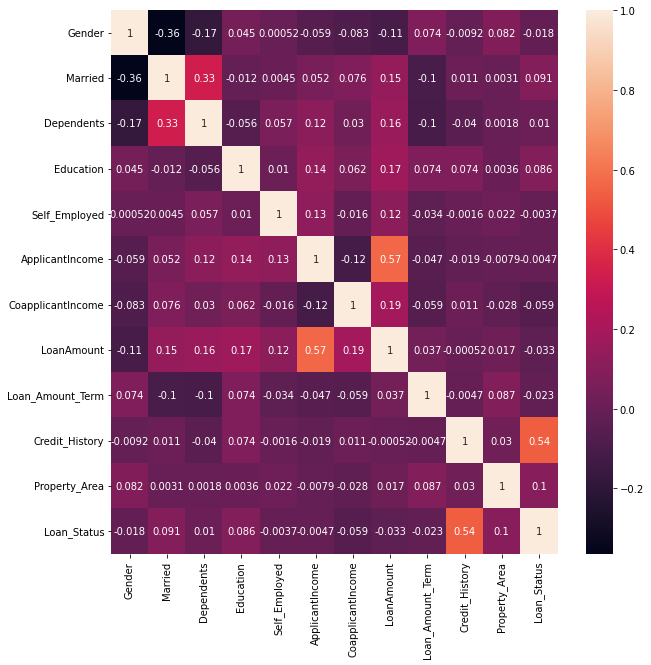

In [580]:
plt.figure(figsize=(10,10))
corr=train.corr()
sns.heatmap(corr,annot=True)
plt.show

In [581]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [582]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **Splitting data**

In [583]:
X=train[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
y=train['Loan_Status'] 


In [584]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# **Scaling the data**

In [585]:
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler() 
#scale.fit(X_train)
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

# **Linear Regression**

In [586]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [587]:
y_pred=log_reg.predict(X_test)
print(log_reg.coef_)
log_reg.intercept_

[[-0.04466349  0.30382443  0.05714446  0.24299092 -0.09381378  0.15532908
  -0.16411501 -0.26748471 -0.09860925  1.27753561  0.29003552]]


array([0.93033767])

0.7723577235772358
[[19 26]
 [ 2 76]]
0.8444444444444443


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


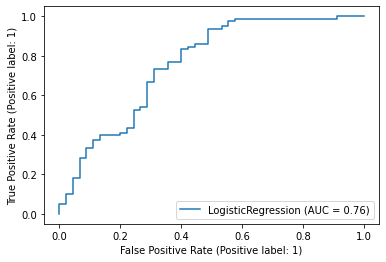

In [588]:
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score 
print(log_reg.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))
plot_roc_curve(log_reg,X_test,y_test)

# **K Nearest Neighbor**

In [589]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=20).fit(X_train,y_train)
y_pred=knn.predict(X_test)

0.7723577235772358
[[18 27]
 [ 1 77]]
0.8461538461538463


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


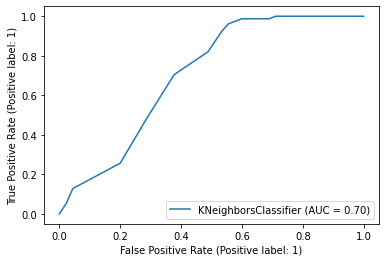

In [590]:
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score 
print(knn.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))
plot_roc_curve(knn,X_test,y_test)

# **Support Vector Machine**

In [591]:
from sklearn import svm
model=svm.SVC(kernel='rbf',gamma='scale')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


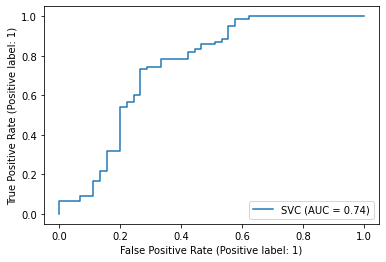

In [592]:
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score
model.score(X_test,y_test)
confusion_matrix(y_test,y_pred) 
f1_score(y_test,y_pred)
plot_roc_curve(model,X_test,y_test)

# **Decision Tree**

In [593]:
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier()
model.fit(X_train,y_train) 
model.predict(X_test)

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


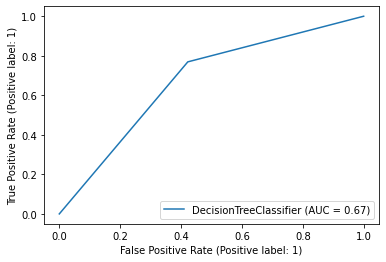

In [594]:
from sklearn.metrics import plot_roc_curve,f1_score,confusion_matrix,roc_auc_score
model.score(X_test,y_test)
confusion_matrix(y_test,y_pred) 
f1_score(y_test,y_pred)
plot_roc_curve(model,X_test,y_test)

# **Deployment**

In [595]:
import pickle 
file='classification_model.sav' 
pickle.dump(model,open(file,'wb'))

In [596]:
loaded_model=pickle.load(open('classification_model.sav','rb'))

In [598]:
input_data=(0,0,0,1,0,5849,0,5678,360.0,1.0,1	)
input_data=np.asarray(input_data)
input_data_reshape=input_data.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshape)
print(prediction)
if(prediction[0]==0):
  print("Loan not approved")
else:
  print("Loan is approved")

[0]
Loan not approved
